<a href="https://colab.research.google.com/github/RealBest07/Miniproject-CNN-sport/blob/main/B6224547_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, precision_score,accuracy_score
import numpy as np
import shutil
import random
import os
tf.random.set_seed(40)
import numpy as np

In [ ]:
conv_base = VGG16(input_shape=(180,180,3),
                  weights='imagenet', 
                  include_top=False)
conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [ ]:
data_augmentation = keras.Sequential(
[ layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2)]
                                    )

In [ ]:
conv_base.trainable=False

inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(512)(x)
x = layers.Activation('relu')(x)
x = layers.Dense(512)(x)
x = layers.Activation('relu')(x)
x = layers.Dense(256)(x)
x = layers.Activation('relu')(x)
x = layers.Dense(256)(x)
x = layers.Activation('relu')(x)
x = layers.Dense(128)(x)
x = layers.Activation('relu')(x)
x = layers.Dense(64)(x)
x = layers.Activation('relu')(x)
x = layers.Dense(32)(x)
x = layers.Activation('relu')(x)
x = layers.Dense(16)(x)

# x = layers.Dropout(0.5)(x)
# x = layers.Dense(256)(x)
# outputs = layers.Dense(1, activation="sigmoid")(x)
outputs=layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer=tf.keras.optimizers.Adam(lr=0.0001),
metrics=["accuracy"])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 512)               6554112   
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, shutil, pathlib
shutil.copyfile(src="/content/drive/MyDrive/AI/sportdataset.zip", dst="/content/sportdataset.zip")

'/content/sportdataset.zip'

In [ ]:
!unzip -qq sportdataset.zip

In [ ]:
# class_list=train_dataset = image_dataset_from_directory("/content/Vegetable Images/train")
class_list=train_dataset = image_dataset_from_directory("/content/sport/train")
print(class_list.class_names)

Found 2848 files belonging to 5 classes.
['badminton', 'baseball', 'basketball', 'fencing', 'football']


In [ ]:
def Import_and_Resize(dataset_dir,image_size=180,batch_size=32,shuffle_set=False):
  class_list=train_dataset = image_dataset_from_directory(dataset_dir+"/train",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set) #set shuffle=True when train, and change shuffle=False when plot CF matrix

  validation_dataset = image_dataset_from_directory(dataset_dir+"/validation",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set) #set shuffle=True when train, and change shuffle=False when plot CF matrix

  test_dataset = image_dataset_from_directory(dataset_dir+"/test",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set) #set shuffle=True when train, and change shuffle=False when plot CF matrix
  print("\nClass name list: %s" %class_list.class_names)

  return train_dataset,validation_dataset,test_dataset,class_list

In [ ]:
def load_and_prep_image(filename, img_shape=180):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  return img

Class: badminton 
Pic name: 00000863.jpg


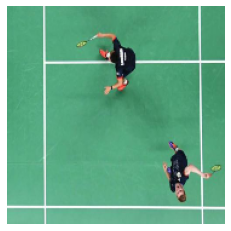

In [ ]:
# <<<< Run again and again for visualize pictures
listclass=os.listdir("/content/sport/validation")
randclass=random.choice(listclass)
listpic=os.listdir("/content/sport/validation/%s"%randclass)
randpic=random.choice(listpic)

img=load_and_prep_image("/content/sport/validation/%s/%s"%(randclass,randpic))
print("Class:",randclass,"\nPic name:",randpic)
img1 = img/255.0
plt.imshow(img1)
plt.axis(False)
plt.show()

In [ ]:
train_dataset,validation_dataset,test_dataset,class_list=Import_and_Resize("/content/sport",
                                                                image_size=180,
                                                                shuffle_set=False)

Found 2848 files belonging to 5 classes.
Found 362 files belonging to 5 classes.
Found 362 files belonging to 5 classes.

Class name list: ['badminton', 'baseball', 'basketball', 'fencing', 'football']


In [ ]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset,)

Epoch 1/20
89/89 [==============================] - 16s 76ms/step - loss: 3.5589 - accuracy: 0.6341 - val_loss: 6.6024 - val_accuracy: 0.2182
Epoch 2/20
89/89 [==============================] - 6s 71ms/step - loss: 2.6272 - accuracy: 0.4698 - val_loss: 2.0676 - val_accuracy: 0.2238
Epoch 3/20
89/89 [==============================] - 6s 71ms/step - loss: 1.5924 - accuracy: 0.4786 - val_loss: 1.8627 - val_accuracy: 0.2569
Epoch 4/20
89/89 [==============================] - 6s 70ms/step - loss: 1.5766 - accuracy: 0.3771 - val_loss: 1.8548 - val_accuracy: 0.2486
Epoch 5/20
89/89 [==============================] - 6s 70ms/step - loss: 1.2051 - accuracy: 0.5590 - val_loss: 1.9924 - val_accuracy: 0.3315
Epoch 6/20
89/89 [==============================] - 6s 69ms/step - loss: 1.1846 - accuracy: 0.5874 - val_loss: 2.1577 - val_accuracy: 0.3923
Epoch 7/20
89/89 [==============================] - 6s 69ms/step - loss: 1.1632 - accuracy: 0.5997 - val_loss: 1.7186 - val_accuracy: 0.4116
Epoch 8/20
8

In [ ]:
def plotloss_acc(his):
  # summarize history for accuracy
  plt.plot(his.history['accuracy'])
  plt.plot(his.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(his.history['loss'])
  plt.plot(his.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

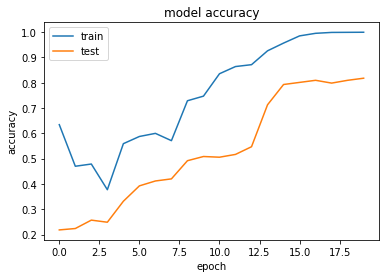

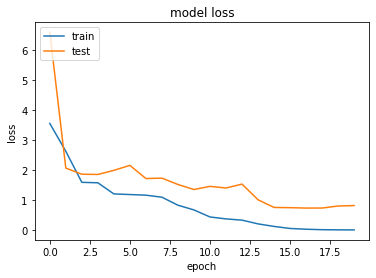

In [ ]:
plotloss_acc(history)

In [ ]:
model.save("/content/drive/MyDrive/AI/save/minipro1.h5")